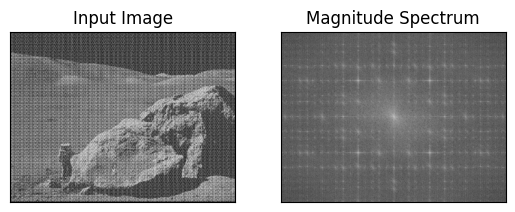

In [3]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
from skimage.feature import peak_local_max
 
img = cv.imread('periodic_noise.jpg', cv.IMREAD_GRAYSCALE)
 
dft = cv.dft(np.float32(img),flags = cv.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
 
magnitude_spectrum = 20*np.log(cv.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
 
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

In [4]:
#Filter creating
# Low pass filter
mask = np.zeros((img.shape[0],img.shape[1],2),np.uint8)
centerX, centerY = (int(img.shape[0] / 2),int(img.shape[1] / 2))
mask[centerX-50:centerX+50, centerY - 50:centerY+50,:] = 1

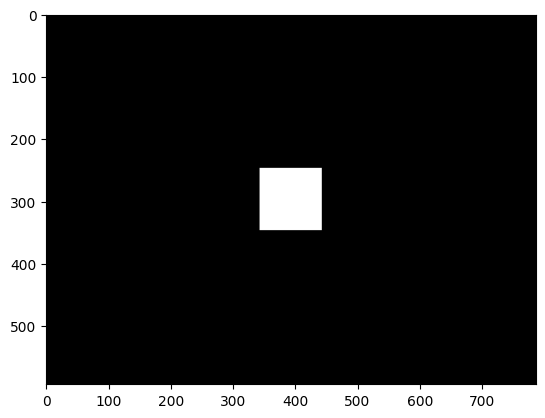

In [5]:
plt.imshow(mask[:,:,0], cmap = 'gray')

In [6]:
# Filtering
dft_shift = dft_shift*mask

C:\Users\liosh\AppData\Local\Temp\ipykernel_15720\3830399572.py:1: RuntimeWarning: divide by zero encountered in log
  filtering_magn_res = 20*np.log(cv.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))


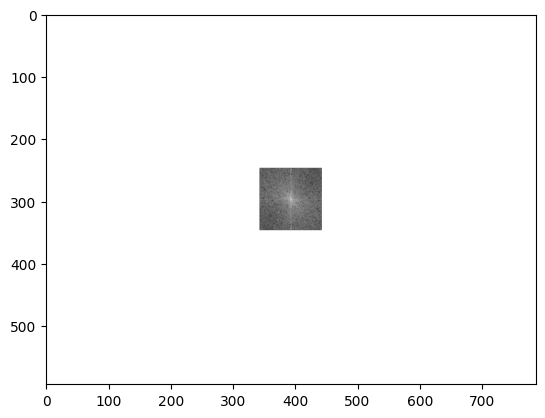

In [7]:
filtering_magn_res = 20*np.log(cv.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
plt.imshow(filtering_magn_res, cmap='gray')

In [8]:
#fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(dft_shift)
img_back = cv.idft(f_ishift)
img_back = cv.magnitude(img_back[:,:,0],img_back[:,:,1])

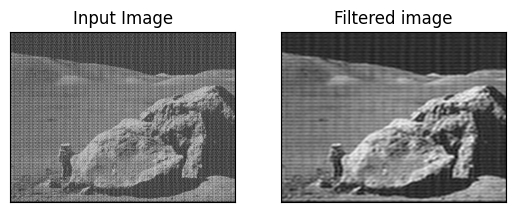

In [9]:
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Filtered image'), plt.xticks([]), plt.yticks([])
plt.show()

In [10]:
# Реализуйте высокочастотную фильтрацию на основе ядра Гаусса
# Реализуйте удаление периодического шума

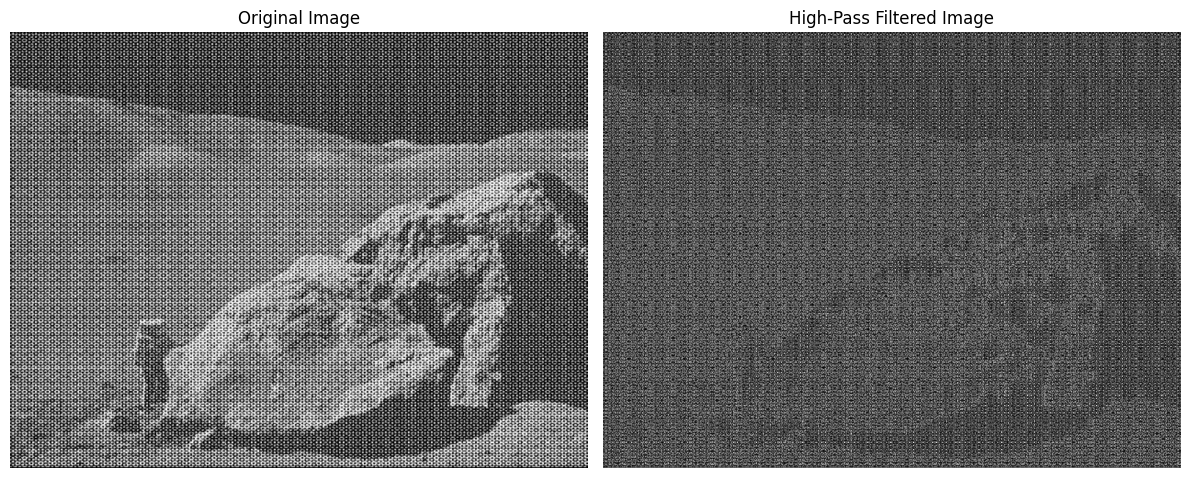

In [11]:
dft_result = cv.dft(np.float32(img), flags=cv.DFT_COMPLEX_OUTPUT)
dft_shifted = np.fft.fftshift(dft_result)

h, w = img.shape
cy, cx = h // 2, w // 2

sigma = 30
x = np.arange(0, w, 1)
y = np.arange(0, h, 1)
X, Y = np.meshgrid(x, y)

gauss_low = np.exp(-((X - cx)**2 + (Y - cy)**2) / (2 * sigma**2))
mask_high = 1.0 - gauss_low

filtered_shift = dft_shifted * mask_high[:, :, np.newaxis]

inverse_shift = np.fft.ifftshift(filtered_shift)
img_filtered = cv.idft(inverse_shift)
img_filtered = cv.magnitude(img_filtered[:, :, 0], img_filtered[:, :, 1])

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_filtered, cmap='gray')
plt.title('High-Pass Filtered Image')
plt.axis('off')

plt.tight_layout()
plt.show()

Detected noise peaks: 3


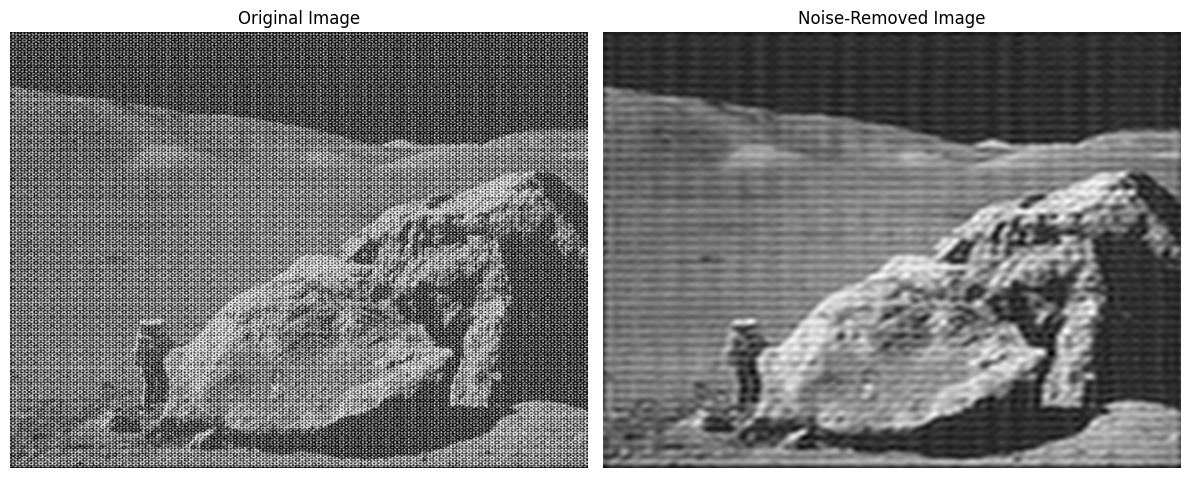

In [12]:
magnitude_spectrum = 20 * np.log1p(cv.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))

min_dist = 10
thr_value = 270
peaks = peak_local_max(magnitude_spectrum, min_distance=min_dist, threshold_abs=thr_value)
print(f"Detected noise peaks: {len(peaks)}")

r = 81
mask_clean = np.ones_like(dft_shift)
cv.circle(mask_clean, (cx, cy), r + 12, (0, 0), -1)
cv.circle(mask_clean, (cx, cy), r - 12, (1, 1), -1)

filtered_shift = dft_shift * mask_clean
inverse_shift = np.fft.ifftshift(filtered_shift)
img_reconstructed = cv.idft(inverse_shift)
img_reconstructed = cv.magnitude(img_reconstructed[:, :, 0], img_reconstructed[:, :, 1])

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_reconstructed, cmap='gray')
plt.title('Noise-Removed Image')
plt.axis('off')

plt.tight_layout()
plt.show()